<a href="https://colab.research.google.com/github/RavinduThamodya/PM2.5_Seasonal/blob/main/Yearly_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xee

In [ ]:
import matplotlib.pyplot as plt
import ee
import geemap
import xarray as xr
import xee

In [ ]:
ee.Authenticate()
ee.Initialize(project = 'air-quality-466614', opt_url = 'https://earthengine-highvolume.googleapis.com')

In [ ]:
gaul = (ee.FeatureCollection("FAO/GAUL/2015/level2")
        .filter(ee.Filter.eq('ADM0_NAME', 'Sri Lanka')))

roi = gaul.geometry()

# **Yearly Data**

In [ ]:
yearly_data = ee.ImageCollection("projects/sat-io/open-datasets/GHAP/GHAP_Y1K_PM25").filterDate('2017','2023')

In [ ]:
yearly_dataset=xr.open_dataset(yearly_data,
                                engine='ee',
                                crs='EPSG:4326',
                                geometry=roi,
                                scale=0.001
                                )

In [ ]:
yearly_avg=yearly_dataset.mean(dim=['lat','lon'])*0.1
yearly_df=yearly_avg.to_dataframe()

<Axes: xlabel='time'>

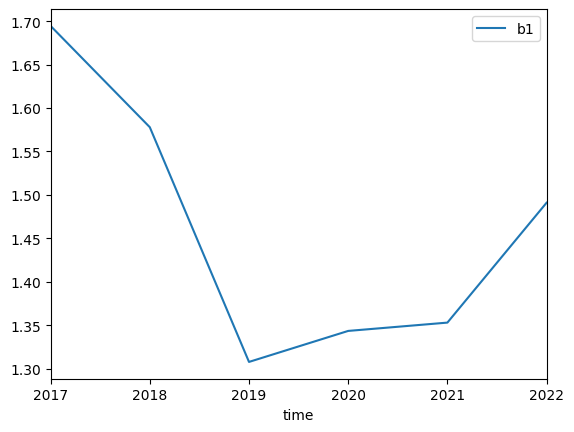

In [ ]:
yearly_df.plot()

In [ ]:
yearly_dataset

<xarray.Dataset> Size: 222MB
Dimensions:  (time: 6, lon: 2358, lat: 3916)
Coordinates:
  * time     (time) datetime64[ns] 48B 2017-01-01 2018-01-01 ... 2022-01-01
  * lon      (lon) float64 19kB 79.52 79.52 79.52 79.52 ... 81.88 81.88 81.88
  * lat      (lat) float64 31kB 5.92 5.921 5.922 5.923 ... 9.833 9.834 9.835
Data variables:
    b1       (time, lon, lat) float32 222MB nan nan nan nan ... nan nan nan nan
Attributes:
    crs:      EPSG:4326

In [ ]:
yearly_dataset_scaled = yearly_dataset * 0.1
yearly_mean = yearly_dataset.mean(dim=['lat','lon'])
yearly_mean_scaled = yearly_mean * 0.1

In [ ]:
# --- Load GAUL district boundaries (Level 2 for Sri Lanka) ---
gaul = (ee.FeatureCollection("FAO/GAUL/2015/level2")
        .filter(ee.Filter.eq('ADM0_NAME', 'Sri Lanka')))

# Convert GAUL districts to GeoDataFrame and reproject to WGS84
districts = geemap.ee_to_gdf(gaul).to_crs(epsg=4326)

/tmp/ipython-input-1591038733.py:17: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax in fig.axes.flat:
/tmp/ipython-input-1591038733.py:21: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for ax, t in zip(fig.axes.flat, yearly_dataset_scaled.time.values):


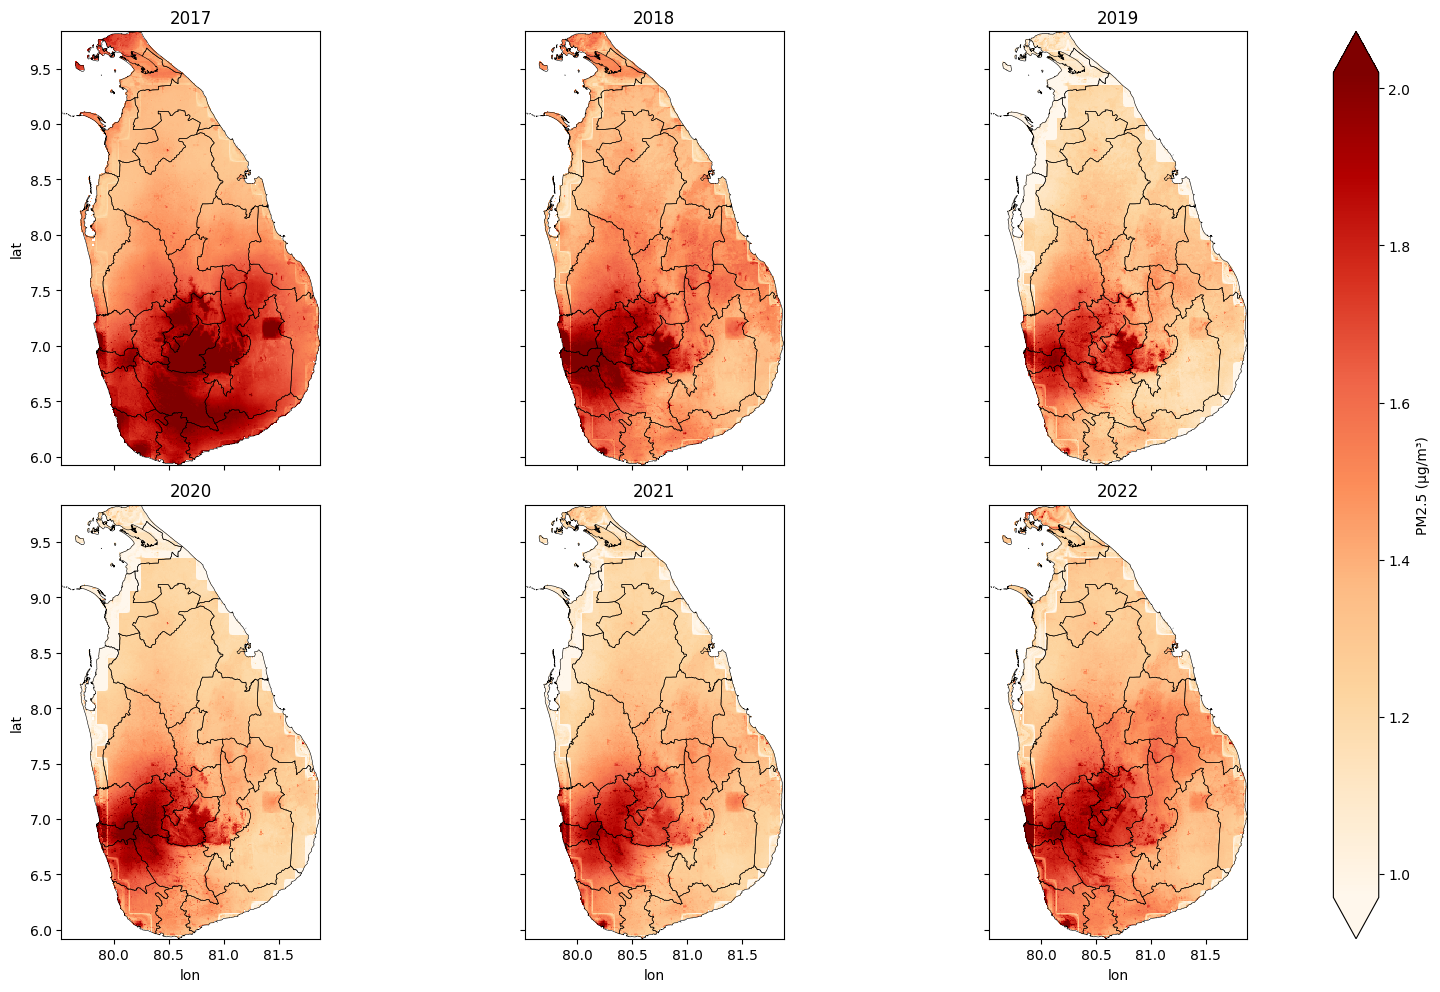

In [ ]:
import matplotlib.pyplot as plt

# --- Plot yearly scaled PM2.5 ---
fig = yearly_dataset_scaled.b1.plot(
    x="lon",
    y="lat",
    col="time",           # one subplot per year
    robust=True,          # auto robust color scaling
    cmap="OrRd",
    col_wrap=3,           # wrap subplots, 3 per row
    figsize=(18,10),
    aspect="equal",
    cbar_kwargs={'label': 'PM2.5 (μg/m³)'}  # set colorbar label
)

# --- Overlay district boundaries (thin lines, not too dark) ---
for ax in fig.axes.flat:
    districts.boundary.plot(ax=ax, color="black", linewidth=0.4)

# --- Update titles to show only the year ---
for ax, t in zip(fig.axes.flat, yearly_dataset_scaled.time.values):
    ax.set_title(str(t.astype('datetime64[Y]')))  # extract only the year

# --- Save final map ---
plt.savefig("Yearly_PM25_with_districts.png", dpi=360, bbox_inches="tight")
plt.show()


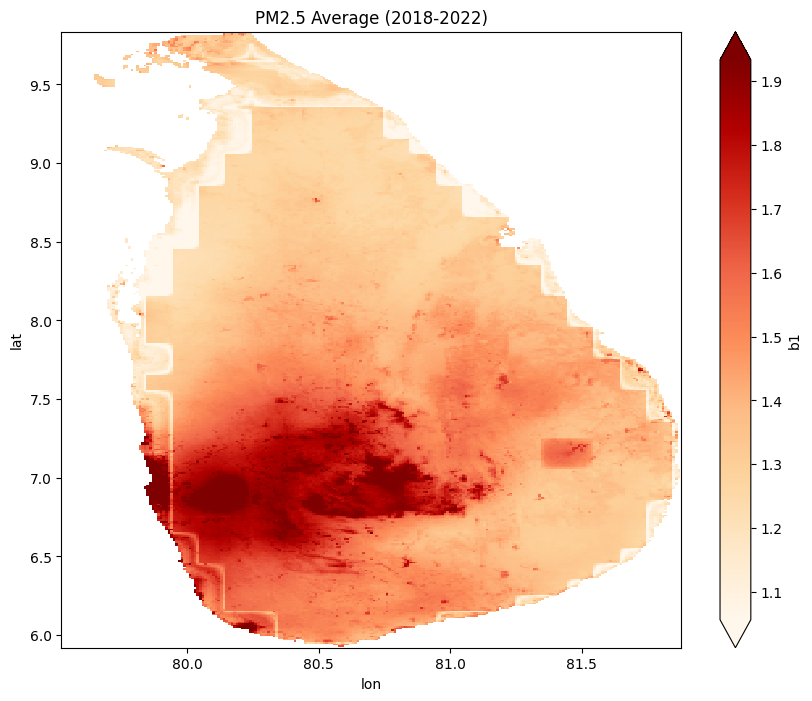

In [ ]:
import matplotlib.pyplot as plt

# Compute the mean over time (yearly average over 2018-2022)
yearly_mean = yearly_dataset['b1'].mean(dim='time')
yearly_mean_scaled = yearly_mean *0.1

# Plot the spatial map
yearly_mean_scaled.plot(
    x="lon",
    y="lat",
    robust=True,
    cmap="OrRd",
    figsize=(10,8)
)

plt.title("PM2.5 Average (2018-2022)")
plt.savefig("Yearly_Average_PM25.png", dpi=360, bbox_inches="tight")
plt.show()


In [ ]:
yearly_dataset_scaled = yearly_dataset * 0.1

KeyboardInterrupt: 

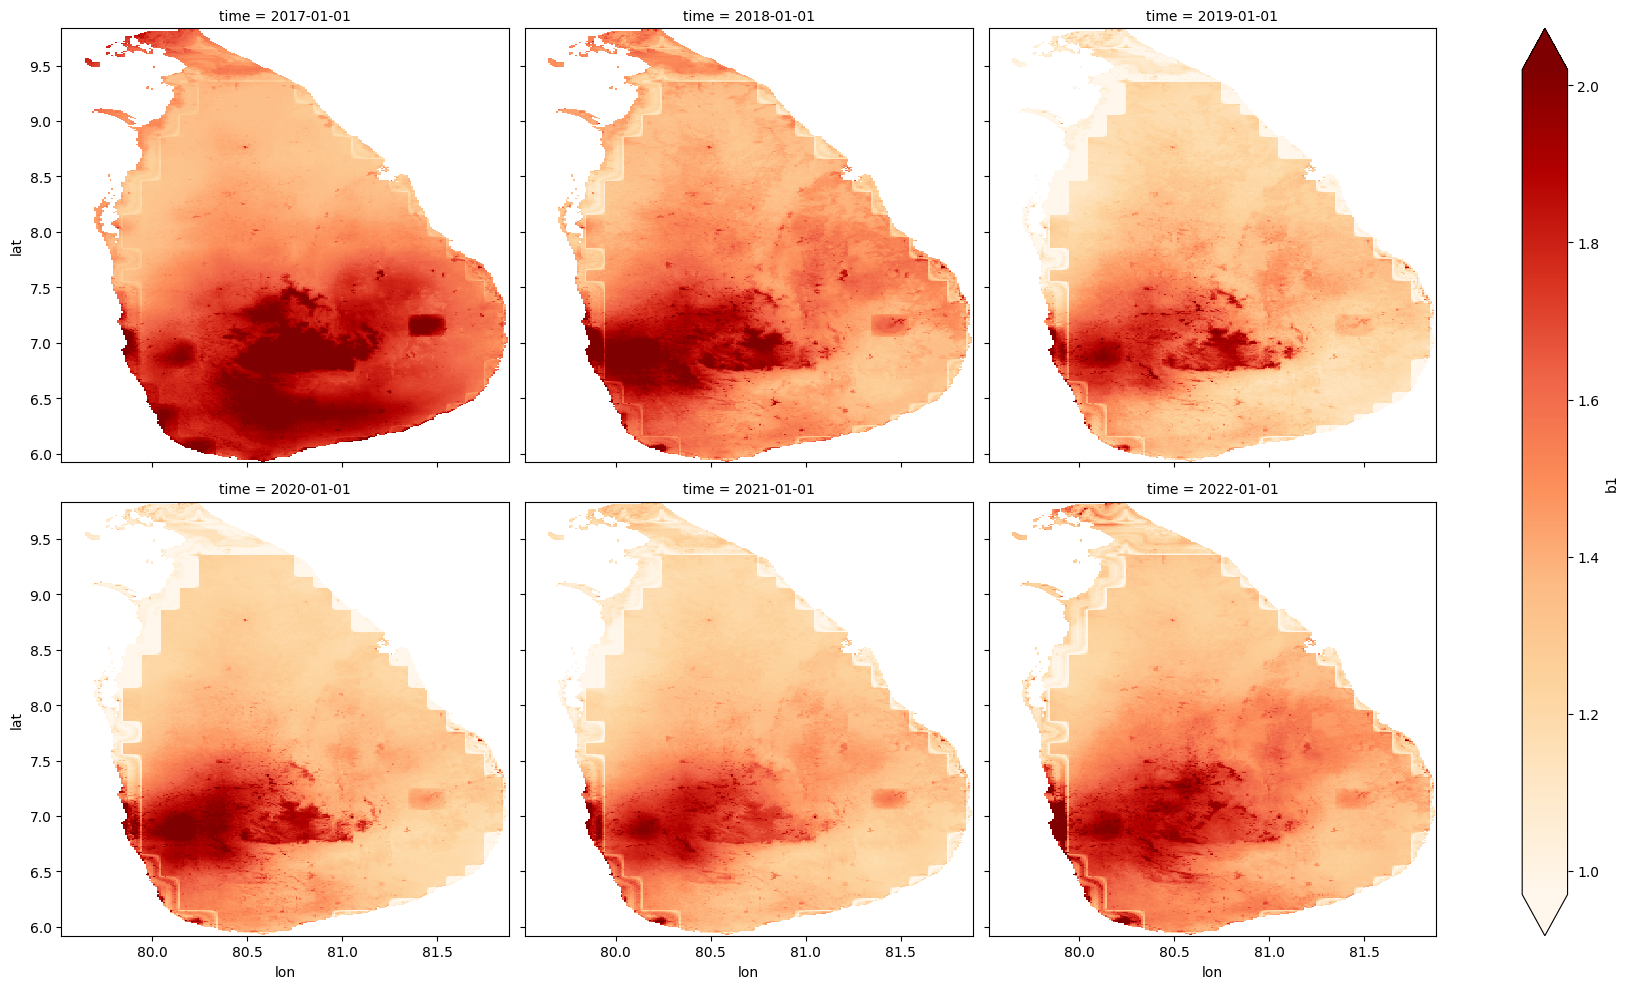

In [ ]:
yearly_dataset_scaled.b1.plot(
    x="lon",
    y="lat",
    col="time",         # creates one subplot per time (year)
    robust=True,        # auto robust color scaling
    cmap="OrRd",
    col_wrap=3,         # wrap subplots, e.g., 3 per row
    figsize=(18,10),
    aspect="equal"
)

# 3. Add title and save
plt.savefig("Yearly_PM25.png", dpi=360, bbox_inches="tight")
plt.show()